In [1]:
%cd c:\Users\almei\Documents\GitHub\tinytorch

c:\Users\almei\Documents\GitHub\tinytorch


In [8]:
import tinytorch

tinytorch.set_init_method('xavier_uniform')

Default initialization method set to 'xavier_uniform'.


In [9]:
from tinytorch.tensor import Tensor
from tinytorch.nn import Linear
from tinytorch.activation import LeakyReLU, ReLU, Sigmoid, SiLU
from tinytorch.module import Module
from tinytorch.optimizer import SGD, Adam
from tinytorch.scheduler import ExponentialLR

# Instantiate the model
class MLP(Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = Linear(1, 20)
    self.layer_2 = Linear(20, 20)
    self.layer_3 = Linear(20, 1)
    self.activation_fn = SiLU()

  def forward(self, input: Tensor) -> Tensor:
    output = self.layer_1(input)
    output = self.activation_fn(output)
    output = self.layer_2(output)
    output = self.activation_fn(output)
    output = self.layer_3(output)

    return output

model = MLP()
print(model)

MLP(
	layer_1: Linear(in_features=1, out_features=20, bias=True),
	layer_2: Linear(in_features=20, out_features=20, bias=True),
	layer_3: Linear(in_features=20, out_features=1, bias=True),
	activation_fn: SiLU(),
)


In [11]:
import numpy as np

# train loop
steps = 30000
learning_rate = 0.0001
dataset_size = 100

# instantiate optimizer
optimizer = Adam(model, learning_rate)

# instantiate scheduler
scheduler = ExponentialLR(optimizer, 0.9999)

# Create dummy data
inputs = np.random.rand(dataset_size).reshape(-1, 1)
inputs.sort()
targets = inputs ** 2 + 4

inputs = Tensor(inputs, label='inputs')
targets = Tensor(targets, label='targets')

# Training loop
for step in range(steps):
  outputs = model(inputs)
  outputs.label = 'outputs'

  # compute loss
  mse_loss = ((targets - outputs)**Tensor(2)).sum()/targets.shape[0]
  mse_loss.label = 'mse_loss'

  # run backprop
  mse_loss.backward()

  # update weitghts
  optimizer.step()

  # zero gradients for the next step
  optimizer.zero_grad()


  if (step+1) % 1000 == 0 or step == 0:
    scheduler.step()
    print(f"Step {step+1} | Loss {mse_loss.value:.4f}")


Step 1 | Loss 19.0386


c:\Users\almei\Documents\GitHub\tinytorch\tinytorch\grads.py:34: RuntimeWarning: invalid value encountered in log
  return second_value*first_value**(second_value-1)*output_grad, ((first_value**second_value)*np.log(first_value)*output_grad).sum()


Step 1000 | Loss 2.8383
Step 2000 | Loss 1.8547
Step 3000 | Loss 1.3400
Step 4000 | Loss 0.8847
Step 5000 | Loss 0.5115
Step 6000 | Loss 0.2204
Step 7000 | Loss 0.0643
Step 8000 | Loss 0.0202
Step 9000 | Loss 0.0085
Step 10000 | Loss 0.0043
Step 11000 | Loss 0.0023
Step 12000 | Loss 0.0014
Step 13000 | Loss 0.0009
Step 14000 | Loss 0.0006
Step 15000 | Loss 0.0004
Step 16000 | Loss 0.0002
Step 17000 | Loss 0.0001
Step 18000 | Loss 0.0001
Step 19000 | Loss 0.0000
Step 20000 | Loss 0.0000
Step 21000 | Loss 0.0000
Step 22000 | Loss 0.0000
Step 23000 | Loss 0.0000
Step 24000 | Loss 0.0000
Step 25000 | Loss 0.0000
Step 26000 | Loss 0.0000
Step 27000 | Loss 0.0000
Step 28000 | Loss 0.0000
Step 29000 | Loss 0.0000
Step 30000 | Loss 0.0000


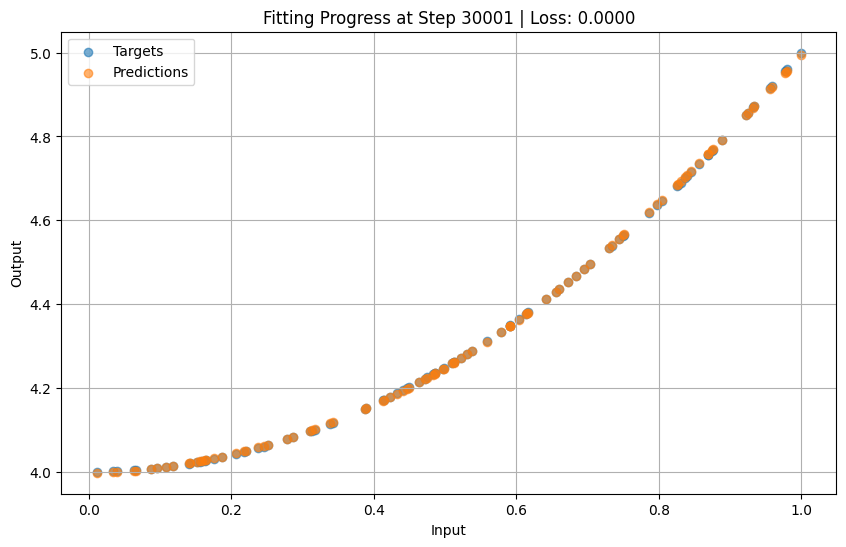

In [12]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_fitting_progress(step, inputs, outputs, targets, mse_loss):
  """
  Plots the progress of the model fitting.

  Args:
    step: The current training step.
    inputs: The input data (Tensor).
    outputs: The model's current predictions (Tensor).
    targets: The target data (Tensor).
    mse_loss: The current MSE loss (Tensor).
  """
  clear_output(wait=True) # Clear previous plot in Colab/Jupyter

  plt.figure(figsize=(10, 6))
  plt.scatter(inputs.value.flatten(), targets.value.flatten(), label='Targets', alpha=0.6)
  plt.scatter(inputs.value.flatten(), outputs.value.flatten(), label='Predictions', alpha=0.6)
  plt.title(f'Fitting Progress at Step {step+1} | Loss: {mse_loss.value:.4f}')
  plt.xlabel('Input')
  plt.ylabel('Output')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Show final fit
plot_fitting_progress(steps, inputs, model(inputs), targets, mse_loss)

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Define the model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(1, 20)
        self.layer_2 = nn.Linear(20, 20)
        self.layer_3 = nn.Linear(20, 1)
        self.activation_fn = nn.SiLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.activation_fn(x)
        x = self.layer_2(x)
        x = self.activation_fn(x)
        x = self.layer_3(x)
        return x

# Instantiate the model
model = MLP()
print(model)

# Hyperparameters
steps = 30000
learning_rate = 0.0001
dataset_size = 100

# Data
inputs = torch.rand(dataset_size, 1)
inputs, _ = torch.sort(inputs, dim=0)
targets = inputs ** 2 + 4

# Optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

# Training loop
for step in range(steps):
    optimizer.zero_grad()

    outputs = model(inputs)
    mse_loss = loss_fn(outputs, targets)

    mse_loss.backward()
    optimizer.step()

    if (step + 1) % 1000 == 0 or step == 0:
        print(f"Step {step+1} | Loss {mse_loss.item():.4f}")

# Plot
inputs = torch.rand(dataset_size, 1)
inputs, _ = torch.sort(inputs, dim=0)
targets = inputs ** 2 + 4

MLP(
  (layer_1): Linear(in_features=1, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
  (activation_fn): SiLU()
)
Step 1 | Loss 16.3554
Step 1000 | Loss 2.0395
Step 2000 | Loss 0.0753
Step 3000 | Loss 0.0360
Step 4000 | Loss 0.0162
Step 5000 | Loss 0.0117
Step 6000 | Loss 0.0108
Step 7000 | Loss 0.0099
Step 8000 | Loss 0.0088
Step 9000 | Loss 0.0076
Step 10000 | Loss 0.0064
Step 11000 | Loss 0.0052
Step 12000 | Loss 0.0040
Step 13000 | Loss 0.0024
Step 14000 | Loss 0.0007
Step 15000 | Loss 0.0000
Step 16000 | Loss 0.0000
Step 17000 | Loss 0.0000
Step 18000 | Loss 0.0000
Step 19000 | Loss 0.0000
Step 20000 | Loss 0.0000
Step 21000 | Loss 0.0000
Step 22000 | Loss 0.0000
Step 23000 | Loss 0.0000
Step 24000 | Loss 0.0000
Step 25000 | Loss 0.0000
Step 26000 | Loss 0.0000
Step 27000 | Loss 0.0000
Step 28000 | Loss 0.0000
Step 29000 | Loss 0.0000
Step 30000 | Loss 0.0000


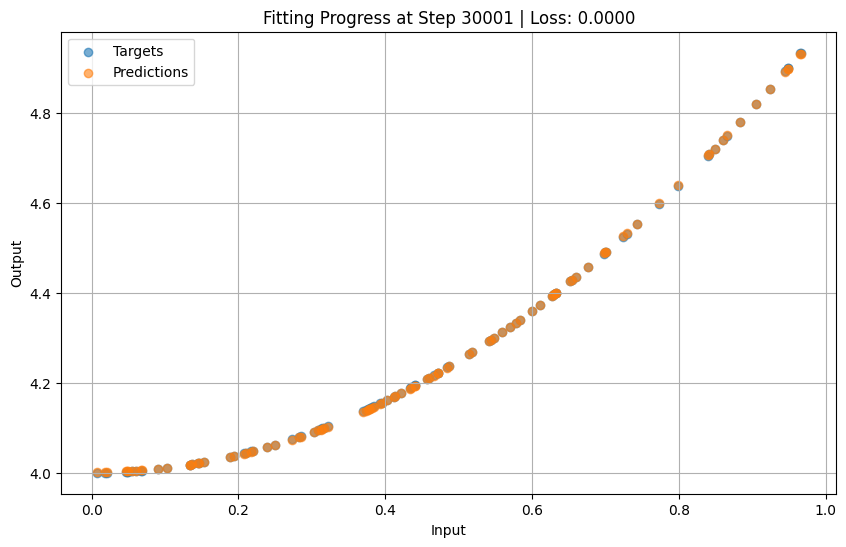

In [15]:
def plot_fitting_progress(step, inputs, outputs, targets, mse_loss):
  """
  Plots the progress of the model fitting.

  Args:
    step: The current training step.
    inputs: The input data (Tensor).
    outputs: The model's current predictions (Tensor).
    targets: The target data (Tensor).
    mse_loss: The current MSE loss (Tensor).
  """
  clear_output(wait=True) # Clear previous plot in Colab/Jupyter

  plt.figure(figsize=(10, 6))
  plt.scatter(inputs.data.flatten(), targets.data.flatten(), label='Targets', alpha=0.6)
  plt.scatter(inputs.data.flatten(), outputs.data.flatten(), label='Predictions', alpha=0.6)
  plt.title(f'Fitting Progress at Step {step+1} | Loss: {mse_loss.data:.4f}')
  plt.xlabel('Input')
  plt.ylabel('Output')
  plt.legend()
  plt.grid(True)
  plt.show()
  

plot_fitting_progress(steps, inputs, model(inputs), targets, mse_loss)
